# NEUTRON: Geometric factor calculations using Monte Carlo simulation data 
By Andrei R. Hanu - <andrei.hanu@nasa.gov>

## Introduction

The geometric factor ($\bf{G}$, units of cm$^2$ sr) of a particle detector is analogous to the "collecting power" of an optical telescope and is a function of the surface area of the instrument and detection efficiency, which itself is a function of the charge, mass, and energy of the incident particles. If the detector's geometry factor is known, the spatial differential flux ($\bf{\Phi}$, units of particles cm$^{-2}$ sr$^{-1}$ sec$^{-1}$) incident on the detector can be calculated from the counting rate ($\bf{N_D}$, units of particles $sec^{-1}$). So very simply, the geometric factor is defined as the counts received by a detector per unit time divided by the spatial differential flux around the instrument.

$$ G = \frac{N_D}{J} $$

** Note: For radiation risk assesment calculations, the flux is typically measured in energy bins with units of particles cm$^{-2}$ sr$^{-1}$ sec$^{-1}$ MeV$^{-1}$ **

Tradiationally, a detector's geometric factor has usually been estimated by approximation, however, only a few analytical solutions exist for simple source and detector geometries - see Sullivan (1971). For more complicated detector geometries, including electronic coincidence/anti-coincidence logic, an analytical solution might be difficult, or even impossible, to derive in the closed form. In such cases, the Monte Carlo technique is employed to compute the geometrical factor, see Crannell et al. (1971), by surrounded the detector geometry with a spherical source and assuming an isotropic radiation environment. Although, you can also apply this technique to anisotropic radiation environments. 

## Isotropic Radiation



## Source Normalization

For isotropic radiation environments, the number of particles $\bf{N_R}$ traversing a sphere is determined by the integrating the spatial differential flux over the surface area of the sphere and solid angle.

$$ N_R = \int_{\Omega}\int_{S} JdSd\Omega $$

Where the differential surface area ($\bf{dS}$) and differential solid angle ($\bf{d\Omega}$) in spherical coordinates is:

$$ dS = R^2 sin \theta d\theta d\phi $$

$$ d\Omega = sin \theta d\theta d\phi $$

Working through the integral, we see that the number of particles $\bf{N_R}$ traversing a sphere is:

$$ N_R = 4 \pi^2 R^2 J $$

And it depends on:

- The radius (ie. bigger sphere == more particles crossing the sphere)
- The spatial differential flux (ie. more flux == more particles crossing the sphere)

Finally, by using Eq.1 and Eq. 5 the geometric factor for an isotropic radiation environments can be written as follows:

$$ G = \frac{N_D}{N_R}4 \pi^2 R^2 $$

Where:

- $N_D$ is the number of particles interacting with the detector model
- $N_R$ is the total number of simulated particles
- $R$ is the radius of the spherical source encircling the detector model

The associated standard deviation ($\bf{\sigma_G}$) is obtained from the binomial distribution and follows:

$$ \sigma_G = 4\pi^2R^2 \sqrt{\left(1-\frac{N_D}{N_R}\right)\frac{N_D}{N_R^2}} $$

## Monte Carlo method

To calculate the geometric factor of a detector using the Monte Carlo method, the following steps need to be taken:

- The detector geometry, or a simplified model, should be implemented in your favourite Monte Carlo particle transport  code (Geant4, MCNP, FLUKA, EGS, etc)

If an isotropic flux, typical of space-borne instruments, is assumed:

- The detector geometry is enveloped by a spherical source such that the spectral, spatial, and angular distribution of primary particles can be specified

- The primary particles must be uniformly distributed over the entire surface of spherical source
- The angular distribution for the emission of primary particles must follow a cosine-law distribution

## References

+ Sullivan, J. D. "Geometric factor and directional response of single and multi-element particle telescopes." Nuclear Instruments and methods 95.1 (1971): 5-11.

+ Crannell, C. J., and J. F. Ormes. "Geometrical-factor determination using a monte carlo approach." Nuclear Instruments and Methods 94.1 (1971): 179-183.

+ Sanderson, T. R., and D. E. Page. "Geometrical aspects of the performance of cosmic ray detector telescopes in non-isotropic particle distributions." Nuclear Instruments and Methods 104.3 (1972): 493-504.


In [46]:
# Matplotlib - 2D plotting library
from matplotlib import pyplot as plt
from matplotlib import rcParams

# Show matplotlib figures inline the notebook
%matplotlib inline

# Pandas - High-performance data analysis
import pandas

# Glob - Unix style pathname pattern expansion
# Used to aggregate folders and files into a single list so they can be iterated over
import glob

# Numpy - For handling of large, multi-dimensional arrays and matrices
import numpy as np

# System calls
import sys

# Divide integers
from __future__ import division

##########################################################################################
# Setting rcParams for publication quality graphs
fig_width_pt = 246.0                    # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inch
golden_mean = (np.sqrt(5)-1.0)/2.0      # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # Width in inches
fig_height = fig_width*golden_mean      # Height in inches
fig_size =  [fig_width, fig_height]
# fig_size =  [7.3,4.2]
fig_size =  [7.3*1.25,4.2*1.25]
# fig_size =  [7.3*1.5,4.2*1.5]
# fig_size =  [7.3*2,4.2*2]
params = {'backend': 'pdf',
        'axes.labelsize': 10,
        'legend.fontsize': 9,
        'xtick.labelsize': 10,
        'ytick.labelsize': 10,
        'xtick.major.size': 6,
        'xtick.major.width': 1,
        'xtick.minor.size': 2.5,
        'xtick.minor.width': 1,
        'ytick.major.size': 6,
        'ytick.major.width': 1,
        'ytick.minor.size': 2.5,
        'ytick.minor.width': 1,
        'font.family': 'sans-serif',
        'font.sans-serif': 'Avant Garde',
        'font.size': 10,
        'text.usetex': True,
        'figure.figsize': fig_size}

# Update rcParams
rcParams.update(params)

In [47]:
##########################################################################################
# Energy of incident particles (Neutrons)
# InputEnergies = np.array([np.linspace(100,900, num=9, endpoint=True, dtype = int),
#                           np.linspace(1000,9000, num=9, endpoint=True, dtype = int),
#                           np.linspace(10000,90000, num=9, endpoint=True, dtype = int)
#                 ]).flatten()

InputEnergies = (np.around(np.logspace(1.0, 6.0, num=75),5)).astype(int)

# Folder containing simulation data
DataFolder = '../Results/Scint_4mm_PV_1mm_Lid_1mm/Neutrons (GB03)/'

##########################################################################################
# Energy thresholds (in eV) for events that will be included in the analysis
Thr_TEPC = 0
Thr_ACD = 1e6

# Print a list of input neutron energies
print "Input Neutron Energies: ", InputEnergies
# for InputEnergy in InputEnergies[InputEnergies.argsort()]:
#     print InputEnergy/1E3, "\t"

Input Neutron Energies:  [     10      11      13      15      18      21      25      29      34
      40      47      55      64      75      88     103     120     140
     164     192     224     262     306     358     418     488     571
     667     779     910    1064    1243    1452    1697    1982    2316
    2706    3162    3694    4316    5043    5892    6883    8042    9396
   10978   12826   14985   17508   20455   23898   27921   32622   38113
   44529   52025   60783   71015   82969   96936  113254  132318  154592
  180616  211020  246542  288044  336532  393182  459369  536697  627042
  732596  855918 1000000]


In [48]:
##########################################################################################
# Load the simulation data for each input energy and calculate the geometric factor
# If the data file has energy in form 1e+06, you can use the following shell script to
# change the name:
# for f in *; do mv "$f" "`echo $f | sed -e "s/e+06/000000/g"`"; done

# Pandas dataframe to hold the raw number of events from each simulation
Data = pandas.DataFrame(index = InputEnergies,
                        columns = ('Source Particles', 
                                   'Total',
                                   'Subthreshold',
                                   'Coinc', 
                                   'Anti-Coinc'))

# Geant4 Source Information
R = 7.75    # Source Radius

# Pandas dataframe of the calculate geometric factors
DataGF = pandas.DataFrame(index = InputEnergies,
                          columns = ('GF Total [cm^2 sr]', 
                                     'GF Total [cm^2 sr] Error',
                                     'GF Coinc [cm^2 sr]',
                                     'GF Coinc [cm^2 sr] Error',
                                     'GF Anti-Coinc [cm^2 sr]',
                                     'GF Anti-Coinc [cm^2 sr] Error'))

# Loop through the input energies to process the data
for InputEnergy in InputEnergies[InputEnergies.argsort()]:
    # Create data file template from current energy 
    DataFilename = 'neutron_' + str(InputEnergy) + 'keV_Nr_*_ISO_nt_G4CNPTEPC_t*.csv*'
    
    # Statistics variables for each input energy data
    nR = 0.
    nTotal = 0.
    nCoinc = 0.
    nAntiCoinc = 0.
    nSubThr = 0.
    
    ##########################################################################################
    # Process the simulation data files
    # Column 0 - Energy deposited in the TEPC sensitive volume [eV]
    # Column 1 - Track length of particles that entirely traverse the TEPC [mm]
    # Column 2 - Energy deposited in the plastic scintillator [eV]
    for dataFile in glob.glob(DataFolder + DataFilename):  
        # Readout CSV files
        try:
#             dataFrame = pandas.read_csv(dataFile, compression='gzip', header=-1, skiprows=6, usecols=[0,1,2,3]).values
            dataFrame = pandas.read_csv(dataFile, header=-1, skiprows=7, usecols=[0,1,2,3]).values
    
            # Extract the number of source particles from the data filename
            nR = int(dataFile.split('_')[-5])

            # Increment statistics
            nTotal += dataFrame[(dataFrame[:,0] > Thr_TEPC),3].sum()
            nCoinc += dataFrame[np.logical_and((dataFrame[:,0] > Thr_TEPC),(dataFrame[:,2] > Thr_ACD)),3].sum()
            nAntiCoinc += dataFrame[np.logical_and((dataFrame[:,0] > Thr_TEPC),(dataFrame[:,2] <= Thr_ACD)),3].sum()
            nSubThr += dataFrame[(dataFrame[:,0] <= Thr_TEPC),3].sum()
        except:
            print "Failed to process " + dataFile.split('/')[-1] + " (Exception: " + sys.exc_info()[0].__name__ + ")"
            pass
    
#     print 'Finished processing ', InputEnergy, 'keV (Total:',nTotal,'Coinc:',nCoinc,'AntiCoinc:',nAntiCoinc,')'
    print 'Finished processing', InputEnergy, 'keV'
    
    # Append the statistics to the Data list
    Data.loc[InputEnergy] = [nR,nTotal,nSubThr,nCoinc,nAntiCoinc]
    
    # Calculate the geometric factors and append to the DataGF list
    try:
        DataGF.loc[InputEnergy] = [nTotal/nR*4*(np.pi**2)*(R**2),
                                   4*(np.pi**2)*(R**2)*np.sqrt((1-nTotal/nR)*nTotal/nR**2),
                                   nCoinc/nR*4*(np.pi**2)*(R**2),
                                   4*(np.pi**2)*(R**2)*np.sqrt((1-nCoinc/nR)*nCoinc/nR**2),
                                   nAntiCoinc/nR*4*(np.pi**2)*(R**2),
                                   4*(np.pi**2)*(R**2)*np.sqrt((1-nAntiCoinc/nR)*nAntiCoinc/nR**2)]
    except:
        pass

# Fill all the NaN to zeros
# Data.fillna(0)
# DataGF.fillna(0)

Finished processing 10 keV
Finished processing 11 keV
Finished processing 13 keV
Finished processing 15 keV
Finished processing 18 keV
Finished processing 21 keV
Finished processing 25 keV
Finished processing 29 keV
Finished processing 34 keV
Finished processing 40 keV
Finished processing 47 keV
Finished processing 55 keV
Finished processing 64 keV
Finished processing 75 keV
Finished processing 88 keV
Finished processing 103 keV
Finished processing 120 keV
Finished processing 140 keV
Finished processing 164 keV
Finished processing 192 keV
Finished processing 224 keV
Finished processing 262 keV
Finished processing 306 keV
Finished processing 358 keV
Finished processing 418 keV
Finished processing 488 keV
Finished processing 571 keV
Finished processing 667 keV
Finished processing 779 keV
Finished processing 910 keV
Finished processing 1064 keV
Finished processing 1243 keV
Finished processing 1452 keV
Finished processing 1697 keV
Finished processing 1982 keV
Finished processing 2316 keV
F

In [49]:
# Print the data file statistics
print Data

        Source Particles    Total Subthreshold    Coinc Anti-Coinc
10             199860000   9536.7            0  182.439    9354.27
11            1000000000  47657.9            0  862.465    46795.4
13            1000000000  46692.3            0  788.262    45904.1
15             204450000   9545.2            0  181.553    9363.65
18             221310000  10295.1            0  161.272    10133.8
21            1000000000  46176.2            0  782.644    45393.5
25            1000000000  45812.9            0  762.326    45050.6
29             201820000  9330.74            0  170.091    9160.65
34             243630000  9948.11            0  192.689    9755.43
40             250000000  10957.6            0  183.882    10773.7
47             250000000  10991.6            0  208.229    10783.4
55             250000000  11100.6            0   173.57      10927
64             250000000  10960.2            0  193.776    10766.4
75             250000000  10823.4            0  182.878    106

In [50]:
# Print the geometric factors
print '\n', DataGF

# Save the geometry factors to a *.csv file
DataGF.to_csv(DataFolder + 'Geometric_Factor_Neutrons.csv', index=True)


        GF Total [cm^2 sr] GF Total [cm^2 sr] Error GF Coinc [cm^2 sr]  \
10                0.113145               0.00115858         0.00216448   
11                0.113005              0.000517631         0.00204505   
13                0.110716              0.000512361         0.00186911   
15                0.110703               0.00113307         0.00210561   
18                0.110305                0.0010871         0.00172791   
21                0.109492              0.000509521         0.00185578   
25                 0.10863              0.000507513         0.00180761   
29                0.109626               0.00113487         0.00199838   
34               0.0968218               0.00097072         0.00187538   
40                 0.10393              0.000992823         0.00174407   
47                0.104252              0.000994362         0.00197499   
55                0.105286              0.000999278         0.00164626   
64                0.103954           

In [51]:
print 'Energy [keV]','Total Error [%]','Coinc Error [%]','Anti-Coinc Error [%]'
for E, err_GF_Total, err_GF_Coinc, err_GF_AntiCoinc in zip(InputEnergies, 
                                       DataGF['GF Total [cm^2 sr] Error']/DataGF['GF Total [cm^2 sr]']*100,
                                       DataGF['GF Coinc [cm^2 sr] Error']/DataGF['GF Coinc [cm^2 sr]']*100,
                                       DataGF['GF Anti-Coinc [cm^2 sr] Error']/DataGF['GF Anti-Coinc [cm^2 sr]']*100):
    print E,'\t\t', np.around(err_GF_Total,3), '\t\t', np.around(err_GF_Coinc,3), '\t\t', np.around(err_GF_AntiCoinc,3)

Energy [keV] Total Error [%] Coinc Error [%] Anti-Coinc Error [%]
10 		1.024 		7.404 		1.034
11 		0.458 		3.405 		0.462
13 		0.463 		3.562 		0.467
15 		1.024 		7.422 		1.033
18 		0.986 		7.874 		0.993
21 		0.465 		3.575 		0.469
25 		0.467 		3.622 		0.471
29 		1.035 		7.668 		1.045
34 		1.003 		7.204 		1.012
40 		0.955 		7.374 		0.963
47 		0.954 		6.93 		0.963
55 		0.949 		7.59 		0.957
64 		0.955 		7.184 		0.964
75 		0.961 		7.395 		0.969
88 		1.012 		8.085 		1.02
103 		0.973 		8.0 		0.98
120 		1.007 		7.276 		1.017
140 		4.973 		44.721 		5.004
164 		4.977 		28.344 		5.055
192 		4.977 		35.769 		5.025
224 		5.089 		26.94 		5.182
262 		5.097 		33.737 		5.157
306 		5.187 		31.104 		5.26
358 		5.408 		29.934 		5.499
418 		5.606 		30.749 		5.702
488 		1.189 		6.247 		1.211
571 		5.497 		30.15 		5.591
667 		5.474 		27.813 		5.583
779 		5.558 		22.801 		5.731
910 		5.625 		23.372 		5.796
1064 		5.788 		10.333 		6.988
1243 		5.614 		10.186 		6.728
1452 		5.298 		9.605 		6.352
1697 		5.207 		9.

Plot saved to: ../Results/Scint_4mm_PV_1mm_Lid_1mm/Neutrons (GB03)/Geometric_Factor_Neutrons.pdf


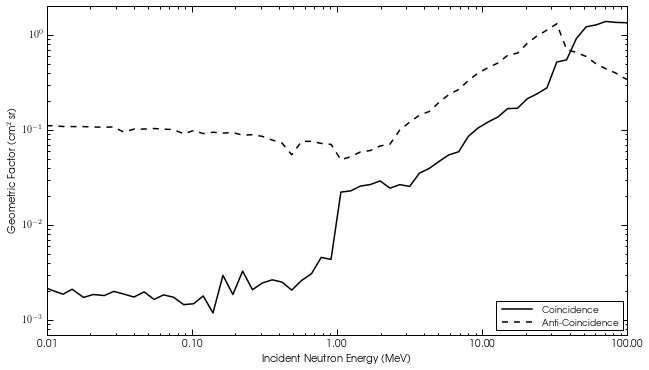

In [52]:
##########################################################################################
# Plot the Geometry Factor over a range of particle energies
figG, axG = plt.subplots(1,1)

# plt.loglog(DataGF.index, DataGF['GF Total [cm^2 sr]'], 'k-', marker='.', linewidth=1., label="Total")
try:
#     plt.fill_between(DataGF.index/1000., DataGF['GF Coinc [cm^2 sr]']-DataGF['GF Coinc [cm^2 sr] Error'], DataGF['GF Coinc [cm^2 sr]']+DataGF['GF Coinc [cm^2 sr] Error'], color='b', alpha=0.2)
    
    plt.loglog(DataGF.index/1000., DataGF['GF Coinc [cm^2 sr]'], 'k-', linewidth=1.5, label="Coincidence")
    plt.loglog(DataGF.index/1000., DataGF['GF Anti-Coinc [cm^2 sr]'], 'k--', linewidth=1.5, label="Anti-Coincidence")
except:
    print "Exception: " + sys.exc_info()[0].__name__
    pass

# Figure Properties
axG.set_ylabel(r'Geometric Factor (cm$^2$ sr)')  
axG.set_xlabel('Incident Neutron Energy (MeV)') 
axG.set_ylim(0.0007, 2.)
axG.set_xlim(0.01, 100.)

from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
# axG.xaxis.set_major_formatter(ScalarFormatter())
axG.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))

axG.legend(loc='lower right',handlelength=4)

# Tight Layout
plt.tight_layout()

# Save the figure 
file_figG = 'Geometric_Factor_Neutrons.pdf'
plt.savefig(DataFolder + file_figG, bbox_inches="tight")
print 'Plot saved to: ' + (DataFolder+file_figG)

# Show the figure
plt.show(figG)

In [53]:
# Print a LaTeX table using the Pandas DataFrame
print DataGF.to_latex(index=True, columns = ('GF Coinc [cm^2 sr]',
                                             'GF Coinc [cm^2 sr] Error',
                                             'GF Anti-Coinc [cm^2 sr]',
                                             'GF Anti-Coinc [cm^2 sr] Error'),
                                  formatters={'GF Anti-Coinc [cm^2 sr]': lambda x: '{:0.1f}'.format(x),
                                              'GF Anti-Coinc [cm^2 sr] Error': lambda x: '{:0.1f}'.format(x),
                                              'GF Coinc [cm^2 sr]': lambda x: '{:0.1f}'.format(x),
                                              'GF Coinc [cm^2 sr] Error': lambda x: '{:0.1g}'.format(x)})

\begin{tabular}{lllll}
\toprule
{} & GF Coinc [cm\textasciicircum2 sr] & GF Coinc [cm\textasciicircum2 sr] Error & GF Anti-Coinc [cm\textasciicircum2 sr] & GF Anti-Coinc [cm\textasciicircum2 sr] Error \\
\midrule
10      &         0.00216448 &              0.000160249 &                0.110981 &                    0.00114745 \\
11      &         0.00204505 &               6.9636e-05 &                 0.11096 &                   0.000512926 \\
13      &         0.00186911 &               6.6573e-05 &                0.108846 &                   0.000508018 \\
15      &         0.00210561 &              0.000156271 &                0.108598 &                    0.00112225 \\
18      &         0.00172791 &              0.000136063 &                0.108577 &                    0.00107855 \\
21      &         0.00185578 &              6.63354e-05 &                0.107636 &                   0.000505185 \\
25      &         0.00180761 &              6.54686e-05 &                0.106823 &  

In [54]:
for E in InputEnergies:
    # Find the largest error between the total, coincidence, and anti-coincidence geometric factors
    errMax = max(DataGF['GF Total [cm^2 sr] Error'].loc[E]/DataGF['GF Total [cm^2 sr]'].loc[E]*100,
                 DataGF['GF Coinc [cm^2 sr] Error'].loc[E]/DataGF['GF Coinc [cm^2 sr]'].loc[E]*100,
                 DataGF['GF Anti-Coinc [cm^2 sr] Error'].loc[E]/DataGF['GF Anti-Coinc [cm^2 sr]'].loc[E]*100)
    
    # If the maximum error is below 1%, scale down the number of source particles (Nr) to save computation time
    # Otherwise scale it up so that we achieve 1% uncertainty
    N_R = np.array(1E7)
    if errMax > 1:
        N_R = np.around(Data['Source Particles'].loc[E]*errMax**2, decimals=-4)
        if N_R > 1E9:
            N_R = np.array(1E9)
        print '/control/alias N_R', N_R.astype(int)
    elif pandas.isnull(errMax):
        print '/control/alias N_R', N_R.astype(int)
    else:
        N_R = np.around(Data['Source Particles'].loc[E]*errMax**2, decimals=-4)
        print '/control/alias N_R', N_R.astype(int)
    
    # Print the energy line
    print "/control/loop runNeutron_ISO.mac Ekin", E, E

/control/alias N_R 1000000000
/control/loop runNeutron_ISO.mac Ekin 10 10
/control/alias N_R 1000000000
/control/loop runNeutron_ISO.mac Ekin 11 11
/control/alias N_R 1000000000
/control/loop runNeutron_ISO.mac Ekin 13 13
/control/alias N_R 1000000000
/control/loop runNeutron_ISO.mac Ekin 15 15
/control/alias N_R 1000000000
/control/loop runNeutron_ISO.mac Ekin 18 18
/control/alias N_R 1000000000
/control/loop runNeutron_ISO.mac Ekin 21 21
/control/alias N_R 1000000000
/control/loop runNeutron_ISO.mac Ekin 25 25
/control/alias N_R 1000000000
/control/loop runNeutron_ISO.mac Ekin 29 29
/control/alias N_R 1000000000
/control/loop runNeutron_ISO.mac Ekin 34 34
/control/alias N_R 1000000000
/control/loop runNeutron_ISO.mac Ekin 40 40
/control/alias N_R 1000000000
/control/loop runNeutron_ISO.mac Ekin 47 47
/control/alias N_R 1000000000
/control/loop runNeutron_ISO.mac Ekin 55 55
/control/alias N_R 1000000000
/control/loop runNeutron_ISO.mac Ekin 64 64
/control/alias N_R 1000000000
/control